<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Adam_Yogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import operator 
import math

In [309]:
df = pd.read_csv('/content/hour.csv')

In [310]:
df_new = df[df.cnt < 500]

In [311]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

In [312]:
x = df_new['temp']
y = scale(df_new.cnt)

#Adam

In [313]:
def Adam(X, y, lr=0.05, epoch=10, eps = 1e-8):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
 
    vm,vb =0,0

    
    beta1, beta2 = 0.9, 0.999
    mmt,mvt,bmt, bvt=0,0,0,0
    mmt_hat, mvt_hat, bmt_hat, bvt_hat = 0,0,0,0

    for i in range(epoch):
      dm, db =0,0

      f = y - (m*X + b)
      dm += lr * (-2 * (X*f).sum() / N)
      db +=  lr * (-2 * f.sum() / N)

      mmt = beta1*mmt + (1 - beta1) * dm
      mvt = beta2*mvt + (1 - beta2) * (dm**2)

      bmt = beta1*bmt + (1 - beta1) * db
      bvt = beta2*bvt + (1 - beta2) * (db**2)

      mmt_hat = mmt/(1- beta1**(i+1))
      mvt_hat = mvt/(1- beta2**(i+1))

      bmt_hat = bmt/(1- beta1**(i+1))
      bvt_hat = bvt/(1-beta2**(i+1))

      m = m - (lr*mmt_hat)/(np.sqrt(mvt_hat) + eps)
      b = b - (lr*bmt_hat)/(np.sqrt(bvt_hat) + eps)

      log.append((m, b))
      mse.append(mean_squared_error(y, (m*X + b)))   

    return m, b, log, mse

#YOGI

In [314]:
def Yogi(X, y, lr=0.05, epoch=10, eps = 1e-3):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
 
    vm,vb =0,0

    
    beta1, beta2 = 0.9, 0.999
    mmt,mvt,bmt, bvt=0,0,0,0
    mmt_hat, mvt_hat, bmt_hat, bvt_hat = 0,0,0,0

    for i in range(epoch):
      dm, db =0,0

      f = y - (m*X + b)
      dm += lr * (-2 * (X*f).sum() / N)
      db +=  lr * (-2 * f.sum() / N)

      mmt = beta1*mmt + (1 - beta1) * dm
      mvt = beta2*mvt + (1 - beta2) * np.sign(int(mvt - dm**2))* (dm**2)

      bmt = beta1*bmt + (1 - beta1) * db
      bvt = beta2*bvt + (1 - beta2) * np.sign(int(bvt - db**2)) * (db**2)

      mmt_hat = mmt/(1- beta1**(i+1))
      mvt_hat = mvt/(1- beta2**(i+1))

      bmt_hat = bmt/(1- beta1**(i+1))
      bvt_hat = bvt/(1-beta2**(i+1))

      m = m - (lr*mmt_hat)/(np.sqrt(mvt_hat) + eps)
      b = b - (lr*bmt_hat)/(np.sqrt(bvt_hat) + eps)

      log.append((m, b))
      mse.append(mean_squared_error(y, (m*X + b)))   

    return m, b, log, mse
    

#PID

In [315]:
def PID_Otimizer(X, y, lr=0.01, epoch=10, Kd=0.9):

  mome_para = 0.9 # momentum factor
  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples

  vm, dt_m, vb, dt_b = 0,0,0,0 
  grad_m, grad_b, prev_grad_m,prev_grad_b= 0,0,0,0


  prev_update_b = 0
  prev_update_m = 0
  prev_update_dt_m = 0
  prev_update_dt_b = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    # Updating m and b
    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    vm = mome_para*prev_update_m + lr * grad_m
    dt_m = mome_para*prev_update_dt_m + (1 - mome_para) * (grad_m - prev_grad_m)

    vb = mome_para*prev_update_b + lr * grad_b
    dt_b = mome_para*prev_update_dt_b + (1 - mome_para)* (grad_b - prev_grad_b)

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    m = m - vm - Kd*dt_m
    b = b - vb - Kd*dt_b

    prev_update_m = vm
    prev_update_dt_m = dt_m

    prev_update_b = vb
    prev_update_dt_b = dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse
 

#APID

In [316]:
def APID(X, y, lr=0.05, epoch=10, Kd=0.9, eps = 1e-8):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0


  prev_b = 0
  prev_m = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    mt_m = prev_mt_m + (grad_m**2)
    vt_m = gamma*prev_vt_m + (lr*grad_m)/np.sqrt(mt_m) + eps
    dt_m = gamma*prev_dt_m + (1-gamma)*(grad_m - prev_grad_m)

    prev_mt_m = mt_m
    prev_vt_m = vt_m
    prev_dt_m = dt_m

    mt_b = prev_mt_b + (grad_b**2)
    vt_b = gamma*prev_vt_b + (lr*grad_b)/np.sqrt(mt_b) + eps
    dt_b = gamma*prev_dt_b + (1-gamma)*(grad_b - prev_grad_b)

    prev_mt_b = mt_b
    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse

#PAPID

In [317]:
def PAPID(X, y, lr=0.05, epoch=10, Kd=0.9, p=1/4, eps = 1e-8):

  #Kd = 0.25*lr + 0.5 + (1 + (16/5)* (3.14)**2) / lr #Calculating the hyperparameter Kd

  m, b = 0.5, 0.5 # parameters
  log, mse = [], [] # lists to store learning process
  N = len(X) # number of samples
  
  gamma = 0.9

  vt_m, dt_m, prev_vt_m, prev_dt_m, mt_m, prev_mt_m = 0,0,0,0,0,0
  vt_b, dt_b, prev_vt_b, prev_dt_b, mt_b, prev_mt_b = 0,0,0,0,0,0
  grad_m, grad_b, prev_grad_m, prev_grad_b= 0,0,0,0


  prev_b = 0
  prev_m = 0
    
  for _ in range(epoch):
    f = y - (m*X + b)

    grad_m = (-2 * (X*f).sum() / N)
    grad_b = (-2 * f.sum() / N)

    mt_m = prev_mt_m + (grad_m**2)
    vt_m = gamma*prev_vt_m + (lr*grad_m)/(mt_m + eps)**p
    dt_m = gamma*prev_dt_m + (1-gamma)*(grad_m - prev_grad_m)

    prev_mt_m = mt_m
    prev_vt_m = vt_m
    prev_dt_m = dt_m

    mt_b = prev_mt_b + (grad_b**2)
    vt_b = gamma*prev_vt_b + (lr*grad_b)/(mt_b + eps)**p
    dt_b = gamma*prev_dt_b + (1-gamma)*(grad_b - prev_grad_b)

    prev_mt_b = mt_b
    prev_vt_b = vt_b
    prev_dt_b = dt_b

    prev_grad_m = grad_m
    prev_gard_b = grad_b

    prev_m = m
    prev_b = b

    m = m - vt_m - Kd*dt_m
    b = b - vt_b - Kd*dt_b
        
    log.append((m, b))
    mse.append(mean_squared_error(y, (m*X + b)))  

  return m, b, log, mse

#PID-YOGI

In [361]:
def YogiPid(X, y, lr=0.05, epoch=10, eps = 1e-3, Kd=10, p=1/4):
    
    m, b = 0.5, 0.5 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
 
    vm,vb =0,0

    
    beta1, beta2 = 0.9, 0.999
    mmt,mvt,bmt, bvt=0,0,0,0
    mmt_hat, mvt_hat, bmt_hat, bvt_hat = 0,0,0,0
    prev_dm, prev_db =0,0
    prev_dt_m, prev_dt_b=0,0

    gamma=0.9

    for i in range(epoch):
      dm, db =0,0

      f = y - (m*X + b)
      dm += lr * (-2 * (X*f).sum() / N)
      db +=  lr * (-2 * f.sum() / N)

      mmt = beta1*mmt + (1 - beta1) * dm
      mvt = beta2*mvt + (1 - beta2) * np.sign(int(dm - prev_dm))* (dm**2)
      dt_m = gamma*prev_dt_m + (1 - gamma) * (dm - prev_dm)

      bmt = beta1*bmt + (1 - beta1) * db
      bvt = beta2*bvt + (1 - beta2) * np.sign(int(dm - prev_db)) * (db**2)
      dt_b = gamma*prev_dt_b + (1 - gamma) * (dm - prev_db)

      mmt_hat = mmt/(1- beta1**(i+1))
      mvt_hat = mvt/(1- beta2**(i+1))

      bmt_hat = bmt/(1- beta1**(i+1))
      bvt_hat = bvt/(1-beta2**(i+1))

      prev_dt_m = dt_m
      prev_dt_b = dt_b

      prev_dm = dm
      prev_db = db

      m = m - (lr*mmt_hat)/((mvt_hat)**p + eps) - Kd*dt_m
      b = b - (lr*bmt_hat)/((bvt_hat)**p + eps) - Kd*dt_b

      log.append((m, b))
      mse.append(mean_squared_error(y, (m*X + b)))   

    return m, b, log, mse
    

In [319]:
m, b, log, mse_adam = Adam(x,y, lr=0.01, epoch=20,eps = 1e-8)
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.08591928677102234


In [320]:
m, b, log, mse_yogi = Yogi(x,y, lr=0.01, epoch=20,eps = 1e-3)
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.0656754330981919


In [321]:
m, b, log, mse_pid = PID_Otimizer(x, y, 0.01, 100, 10)
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06009328422225369


In [322]:
m, b, log, mse_apid = APID(x, y, 0.01, 20, 10, 1e-8)
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.060084421144719055


In [323]:
m, b, log, mse_papid = PAPID(x, y, 0.01, 20, 10, 1/16, 1e-8)
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.05988595519876111


In [365]:
m, b, log, mse_yogipid = YogiPid(x,y, 0.01, 20, 1e-3, 20, 1/16)
y_pred = m*x + b
print("MSE:",mean_squared_error(y, y_pred))

MSE: 0.06349822007345517


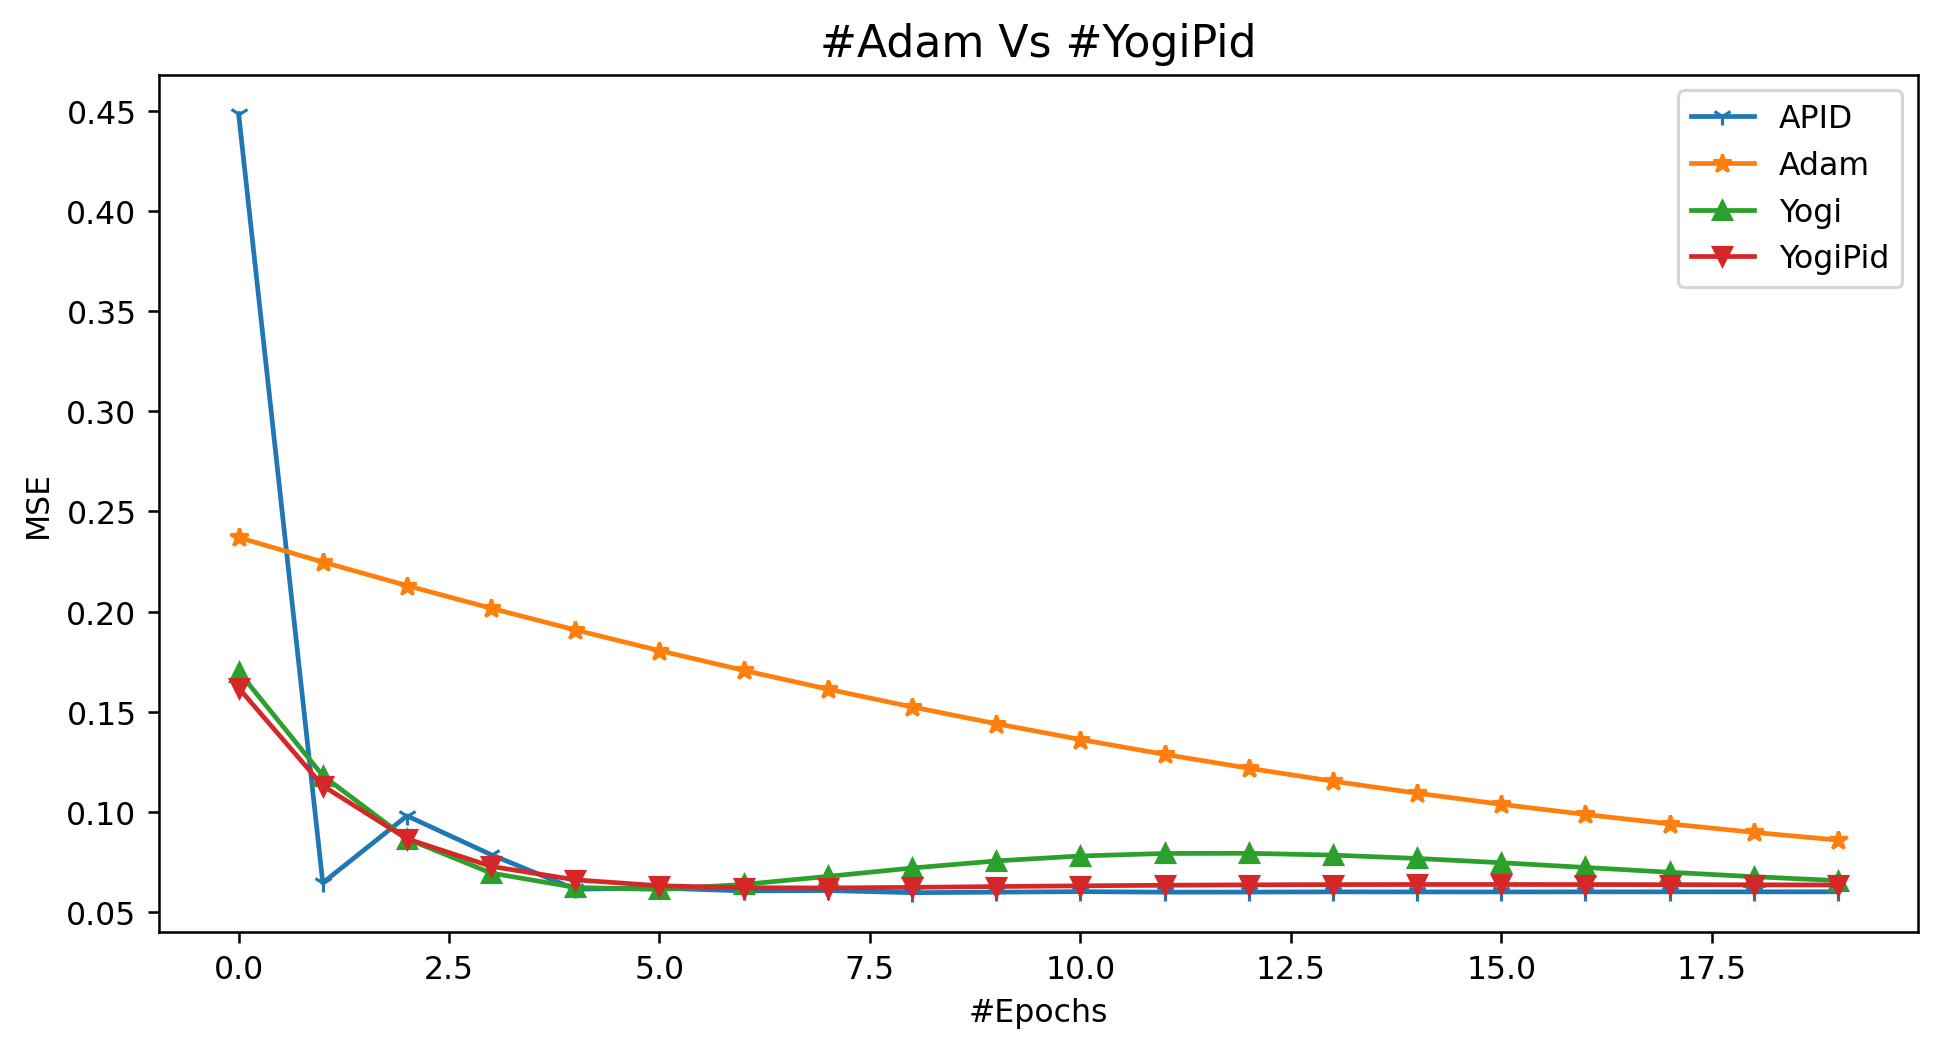

In [325]:
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi'] = 227
#plt.plot(range(len(mse_pid)), mse_pid, label='PID', marker='|')
plt.plot(range(len(mse_apid)), mse_apid, label='APID', marker='1')
plt.plot(range(len(mse_adam)), mse_adam, label='Adam', marker='*')
plt.plot(range(len(mse_yogi)), mse_yogi, label='Yogi', marker= '^')
#plt.plot(range(len(mse_papid)), mse_papid, label='Papid', marker='.')
plt.plot(range(len(mse_yogipid)), mse_yogipid, label='YogiPid', marker= 'v')








plt.title('#Adam Vs #YogiPid', fontSize=14)
plt.xlabel('#Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Speed Test

In [326]:
X1=x
X1 = np.concatenate((X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1,X1))
y1 = np.concatenate((y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y))

In [327]:
%%timeit 
Adam(X1, y1, lr=0.01, epoch=20,eps = 1e-3)

10 loops, best of 5: 77 ms per loop


In [328]:
%%timeit 
Yogi(X1, y1, lr=0.01, epoch=20, eps = 1e-3)

10 loops, best of 5: 76.8 ms per loop


In [329]:
%%timeit
PID_Otimizer(X1, y1, 0.01, 20, 10)

10 loops, best of 5: 77.1 ms per loop


In [330]:
%%timeit
APID(X1, y1, 0.01, 20, 10, 1e-8)

10 loops, best of 5: 77 ms per loop


In [331]:
%%timeit
PAPID(X1, y1, 0.01, 20, 10, 1/16, 1e-8)

10 loops, best of 5: 78.4 ms per loop


In [332]:
%%timeit
YogiPid(X1,y1, 0.01, 20, 1e-3, 20)

10 loops, best of 5: 78.2 ms per loop
